In [1]:
from tqdm.std import tqdm, trange
from tqdm import notebook
notebook.tqdm = tqdm
notebook.trange = trange

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
# Load the data
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [3]:
training_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
type(training_data.data)

torch.Tensor

In [5]:
training_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
training_data.data[13]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  38, 222, 225,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 147, 234, 252, 176,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23,
         197, 253, 252, 208,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 178,
         252, 253, 117,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

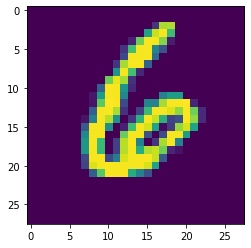

In [7]:
fig, ax = plt.subplots()
ax.imshow(training_data.data[13])

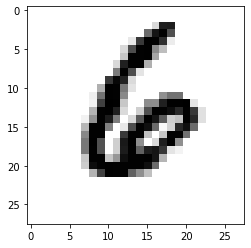

In [8]:
fig, ax = plt.subplots()
ax.imshow(training_data.data[13],cmap='binary')

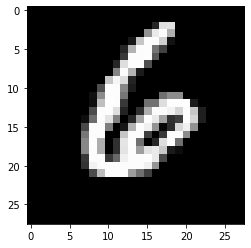

In [9]:
fig, ax = plt.subplots()
ax.imshow(training_data.data[13],cmap='binary_r')

In [10]:
training_data.targets[13]

tensor(6)

In [11]:
training_data.targets[13].item()

6

In [12]:
flatten = nn.Flatten()

In [13]:
flatten(training_data.data[:13])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [14]:
training_data.data[:13].shape

torch.Size([13, 28, 28])

In [15]:
flatten(training_data.data[:13]).shape

torch.Size([13, 784])

In [16]:
class ThreeBlue(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()

    def forward(self,x):
        y = self.flatten(x)
        return y

In [17]:
mon = ThreeBlue()

In [18]:
type(mon)

__main__.ThreeBlue

In [19]:
mon.flatten

Flatten(start_dim=1, end_dim=-1)

In [20]:
mon.flatten(training_data.data[:13])

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [21]:
class ThreeBlue(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(784,10)
        )

    def forward(self,x):
        y = self.flatten(x)
        z = self.layers(y)
        return z

In [22]:
mon = ThreeBlue()

In [23]:
mon(training_data.data)

RuntimeError: expected scalar type Float but found Byte

In [24]:
training_data.data.numpy().max()

255

In [25]:
training_data.data.max()

tensor(255, dtype=torch.uint8)